# Análise Descritiva: Longevidade no Seguimento Militar

## Introdução
Este estudo visa analisar a longevidade de indivíduos do seguimento militar, explorando estatísticas descritivas como distribuição de idade, medidas de centralidade e variabilidade dos dados.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Análise de Dados/Dados"

df = pd.read_csv(path + '/age_dataset.csv')

military_df = df[df['Occupation'].str.contains('police officer|general', case=False, na=False)]

# Contar o número de registros por cada ocupação militar
military_occupation_counts = military_df['Occupation'].value_counts()

# Exibir o número de registros por ocupação
print(military_occupation_counts)

military_df = military_df[['Birth year', 'Death year', 'Age of death']]
military_df.dropna(inplace=True)
military_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Occupation
Police officer                               1062
General officer                               230
Vicar general                                  71
General practitioner                           60
Lieutenant general                             19
                                             ... 
Police officer; statistician                    1
General of the infantry (imperial russia)       1
Governor-general; amtmann                       1
Generalstabsoffizier                            1
Attorney general                                1
Name: count, Length: 134, dtype: int64


,Birth year,Death year,Age of death
5441,1831,1893.0,62.0
6492,1813,1885.0,72.0
6869,1897,1969.0,72.0
7993,1715,1781.0,66.0
8093,1927,2014.0,87.0


## Distribuição dos Dados

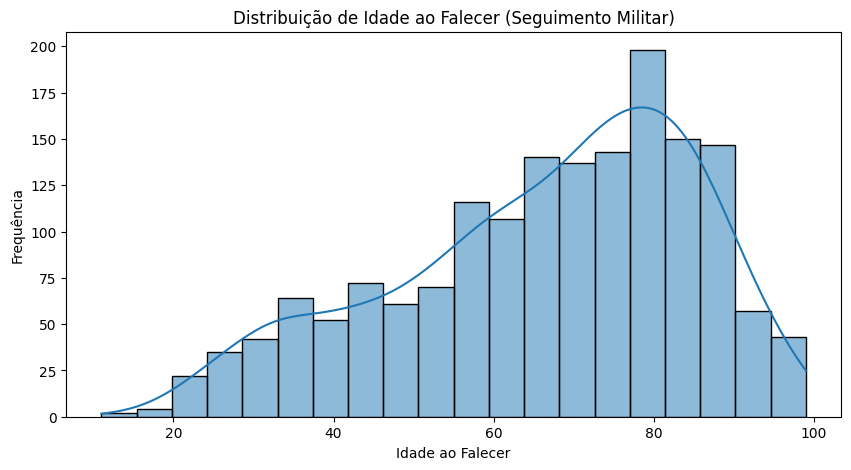

In [76]:
plt.figure(figsize=(10, 5))
sns.histplot(military_df['Age of death'], kde=True)
plt.title('Distribuição de Idade ao Falecer (Seguimento Militar)')
plt.xlabel('Idade ao Falecer')
plt.ylabel('Frequência')

plt.show()

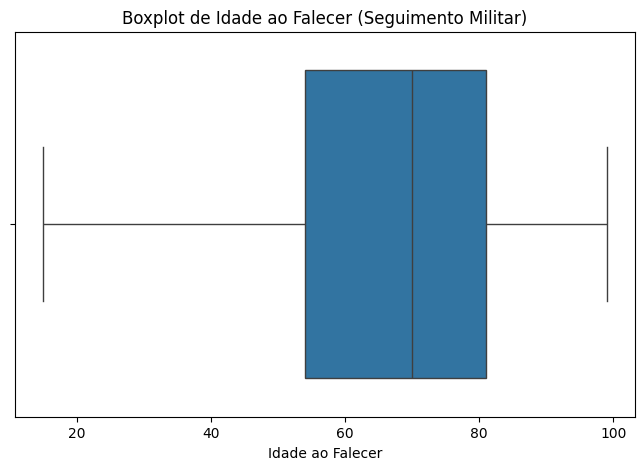

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=military_df['Age of death'], showfliers=False)
plt.title('Boxplot de Idade ao Falecer (Seguimento Militar)')
plt.xlabel('Idade ao Falecer')
plt.show()

## Medidas de Centralidade

In [77]:
# Cálculos das medidas de tendência central
mean_age = military_df['Age of death'].mean()
median_age = military_df['Age of death'].median()
mode_age = military_df['Age of death'].mode()[0]


print(f"Idade média de morte: {int(mean_age)} anos")
print(f"Idade mediana de morte: {int(median_age)} anos")
print(f"Moda das idades de morte: {int(mode_age)} anos")

Idade média de morte: 66 anos
Idade mediana de morte: 70 anos
Moda das idades de morte: 82 anos


## Medidas de Variação

In [74]:
std_dev_age = military_df['Age of death'].std()
iqr_age = military_df['Age of death'].quantile(0.75) - military_df['Age of death'].quantile(0.25)

print(f"Desvio padrão das idades de morte: {int(std_dev_age)} anos")
print(f"Intervalo Interquartil (IQR) das idades de morte: {int(iqr_age)} anos")

Desvio padrão das idades de morte: 18 anos
Intervalo Interquartil (IQR) das idades de morte: 27 anos


## Formulação e Demonstração de Hipótese

### Hipótese
A hipótese exploratória definida para este estudo é:

**"A média de idade ao falecer é maior para indivíduos de ocupações militares e paramilitares de alto escalão (como generais, comandantes) em comparação com indivíduos de baixo escalão (soldados da polícia militar)."**

Para testar essa hipótese, iremos comparar as médias e outras estatísticas descritivas da idade ao falecer entre os dois grupos.

Estatísticas descritivas por escalão:
           mean  median        std  count
Rank                                     
High  70.024194    71.0  14.923218    496
Low   64.723605    69.0  19.953016   1165

Resultados do Teste T:
T-Statistic: 5.9609
P-Value: 0.0000


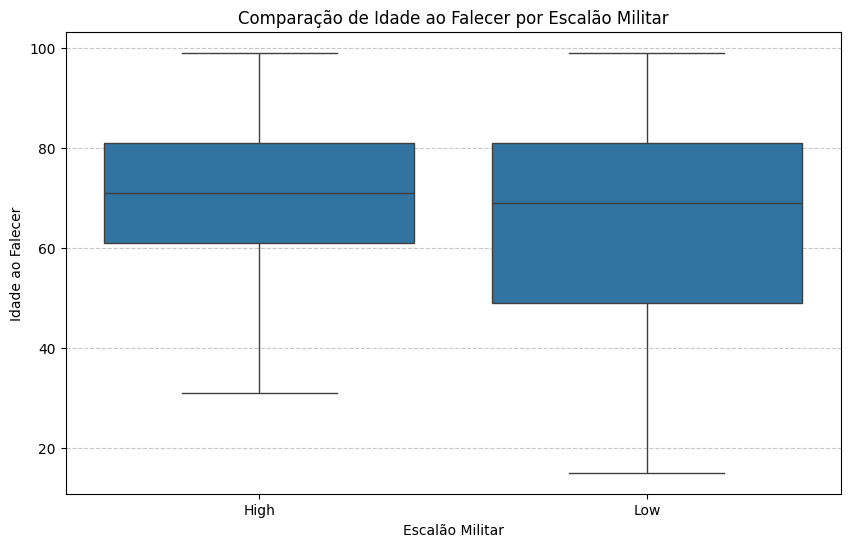

In [80]:
# Filtrar para ocupações militares
military_df = df[df['Occupation'].str.contains("police officer|general|commander", case=False, na=False)].copy()

# Classificar ocupação em alto e baixo escalão para militares
military_df['Rank'] = military_df['Occupation'].apply(
    lambda x: 'High' if any(rank in str(x).lower() for rank in ['general', 'commander']) else 'Low'
)

# Calcular IQR (Intervalo Interquartil)
Q1 = military_df['Age of death'].quantile(0.25)
Q3 = military_df['Age of death'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remover outliers
military_df = military_df[(military_df['Age of death'] >= lower_limit) & (military_df['Age of death'] <= upper_limit)]

# Agrupar por Rank e calcular as estatísticas para Idade ao Falecer
rank_stats_no_outliers = military_df.groupby('Rank')['Age of death'].agg(['mean', 'median', 'std', 'count'])

# Dividir os dados em grupos
high_rank_no_outliers = military_df[military_df['Rank'] == 'High']['Age of death'].dropna()
low_rank_no_outliers = military_df[military_df['Rank'] == 'Low']['Age of death'].dropna()

# Realizar o teste T
from scipy.stats import ttest_ind
t_stat_no_outliers, p_value_no_outliers = ttest_ind(high_rank_no_outliers, low_rank_no_outliers, equal_var=False)

# Exibir estatísticas descritivas por escalão
print("Estatísticas descritivas por escalão:")
print(rank_stats_no_outliers)

# Exibir os resultados do Teste T
print("\nResultados do Teste T:")
print(f"T-Statistic: {t_stat_no_outliers:.4f}")
print(f"P-Value: {p_value_no_outliers:.4f}")

# Visualizar com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Rank", y="Age of death", data=military_df, showfliers=False) 
plt.title('Comparação de Idade ao Falecer por Escalão Militar')
plt.xlabel('Escalão Militar')
plt.ylabel('Idade ao Falecer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análise Qualitativa dos Resultados

- Média: O alto escalão vive, em média, 70 anos, enquanto o baixo escalão vive 65 anos.

- Mediana: A idade central do alto escalão é 71 anos, maior que os 69 anos do baixo escalão.

- Desvio Padrão: O baixo escalão tem maior variação na idade ao falecer (20 anos) comparado ao alto escalão (15 anos).

- Tamanho da Amostra: O baixo escalão tem mais registros (1165) do que o alto escalão (497).

# Conclusão

A análise confirmou que militares de alto escalão tendem a viver mais do que os de baixo escalão, com uma diferença estatisticamente significativa na longevidade. Isso é evidenciado pela maior média e mediana de idade ao falecer no alto escalão, além de uma menor variabilidade nesses valores, indicando maior consistência na longevidade desse grupo.

# Limitações

- Possíveis vieses devido a dados desbalanceados;

- Falta de variáveis contextuais (como condições de saúde, exposição a riscos ou tempo de serviço);

- Exclusão de outras ocupações militares relevantes.